In [1]:
from fastai.vision.all import *


/opt/miniconda/envs/pt2/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
image_file_names = get_image_files('/home/ayushman/code/datasets/FakeJourney')
caption_file_names = image_file_names.map(lambda x: x.parent/x.name.replace('.png', '.txt'))


In [13]:
open(caption_file_names[3], 'r').read().strip()


'An artistic rendering of a camera with a futuristic design. The camera has a gold and black color scheme and is covered in intricate details. The lens of the camera is large and prominently featured, taking up most of the foreground of the image. The rest of the camera is made up of gears and mechanical parts, giving it a high-tech appearance. The image has a dark background, emphasizing the camera and its details. The style of the drawing is similar to a sketch, with rough edges and visible lines.'

In [14]:
image_file_names = image_file_names.map(str)
caption_file_names = caption_file_names.map(str)
image_file_names, caption_file_names


((#2892) ['/home/ayushman/code/datasets/FakeJourney/fakejourney (2366).png','/home/ayushman/code/datasets/FakeJourney/fakejourney (1044).png','/home/ayushman/code/datasets/FakeJourney/fakejourney (406).png','/home/ayushman/code/datasets/FakeJourney/fakejourney (308).png','/home/ayushman/code/datasets/FakeJourney/fakejourney (1458).png','/home/ayushman/code/datasets/FakeJourney/fakejourney (1917).png','/home/ayushman/code/datasets/FakeJourney/mjhn (91).png','/home/ayushman/code/datasets/FakeJourney/fakejourney (2099).png','/home/ayushman/code/datasets/FakeJourney/fakejourney (2072).png','/home/ayushman/code/datasets/FakeJourney/fakejourney (1711).png'...],
 (#2892) ['/home/ayushman/code/datasets/FakeJourney/fakejourney (2366).txt','/home/ayushman/code/datasets/FakeJourney/fakejourney (1044).txt','/home/ayushman/code/datasets/FakeJourney/fakejourney (406).txt','/home/ayushman/code/datasets/FakeJourney/fakejourney (308).txt','/home/ayushman/code/datasets/FakeJourney/fakejourney (1458).txt

In [25]:
df = pd.DataFrame({'image': image_file_names, 'text': caption_file_names})
df.head()


,image,text
0,/home/ayushman/code/datasets/FakeJourney/fakejourney (2366).png,/home/ayushman/code/datasets/FakeJourney/fakejourney (2366).txt
1,/home/ayushman/code/datasets/FakeJourney/fakejourney (1044).png,/home/ayushman/code/datasets/FakeJourney/fakejourney (1044).txt
2,/home/ayushman/code/datasets/FakeJourney/fakejourney (406).png,/home/ayushman/code/datasets/FakeJourney/fakejourney (406).txt
3,/home/ayushman/code/datasets/FakeJourney/fakejourney (308).png,/home/ayushman/code/datasets/FakeJourney/fakejourney (308).txt
4,/home/ayushman/code/datasets/FakeJourney/fakejourney (1458).png,/home/ayushman/code/datasets/FakeJourney/fakejourney (1458).txt


In [26]:
import datasets


In [27]:
ds = datasets.Dataset.from_pandas(df)
ds = ds.map(lambda x: {'image': x['image'], 'text': open(x['text'], 'r').read().strip()})


Map: 100%|██████████| 2892/2892 [00:00<00:00, 14768.55 examples/s]


In [28]:
ds = ds.cast_column('image', datasets.Image())


<Axes: title={'center': 'A close up of a pink flower with a dark background.'}>

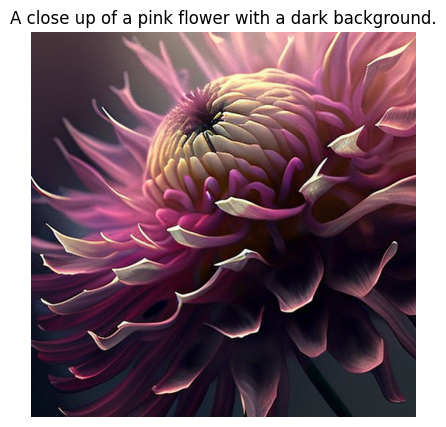

In [32]:
show_image(ds[0]['image'], title=ds[0]['text'])


<Axes: title={'center': 'Baby Yoda sitting in a brown chair holding a cup of coffee'}>

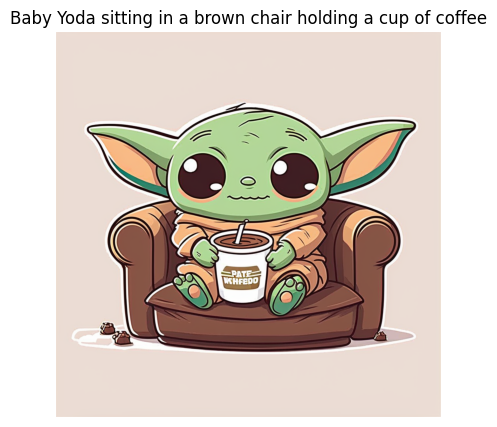

In [34]:
show_image(ds[1]['image'], title=ds[1]['text'])


<Axes: title={'center': 'A digital painting of an Asian woman in a traditional dress and tiger makeup holding a tiger cub.'}>

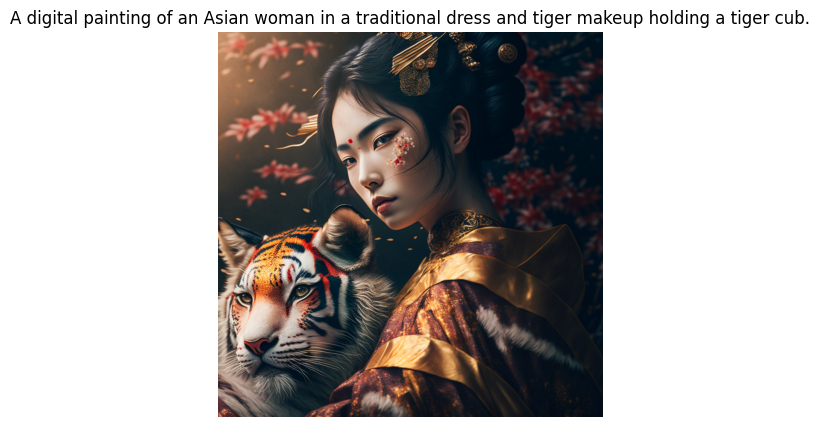

In [35]:
show_image(ds[2]['image'], title=ds[2]['text'])


<Axes: title={'center': 'A painting of a vase filled with flowers on a table.'}>

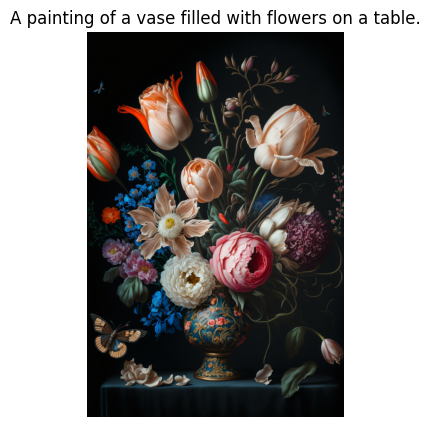

In [37]:
show_image(ds[5]['image'], title=ds[5]['text'])


In [31]:
ds.save_to_disk("/home/ayushman/code/datasets/cached/hf-datasets-----FakeJourney")


Saving the dataset (12/12 shards): 100%|██████████| 2892/2892 [00:06<00:00, 447.41 examples/s]


In [5]:
from diffusers import AutoencoderKL, DDPMScheduler, StableDiffusionPipeline, UNet2DConditionModel


/opt/miniconda/envs/pt2/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pipe = StableDiffusionPipeline.from_pretrained(
    'runwayml/stable-diffusion-v1-5',
    requires_safety_checker=False,
)


Loading pipeline components...:  71%|███████▏  | 5/7 [00:00<00:00, 13.09it/s]`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00, 10.04it/s]


In [3]:
pipe.unet.save_pretrained('/home/ayushman/code/custom/train_mini_sd_poc/configs')


In [4]:
!rm -rf /home/ayushman/code/custom/train_mini_sd_poc/configs/diffusion_pytorch_model.safetensors


In [1]:
import json


In [2]:
unet_config = json.load(open('/home/ayushman/code/custom/train_mini_sd_poc/configs/config.json', 'r'))


In [3]:
unet_config['down_block_types'] = ["CrossAttnDownBlock2D", "CrossAttnDownBlock2D", "DownBlock2D"]
unet_config['up_block_types'] = ["CrossAttnUpBlock2D", "CrossAttnUpBlock2D", "UpBlock2D"]
unet_config['block_out_channels'] = [32, 64, 64]
unet_config['layers_per_block'] = 4
unet_config['cross_attention_dim'] = 128
unet_config['encoder_hid_dim'] = 768
unet_config['encoder_hid_dim_type'] = "text_proj"
unet_config['attention_head_dim'] = 8
unet_config['num_class_embeds'] = None
unet_config['sample_size'] = 64


In [6]:
unet = UNet2DConditionModel.from_config(unet_config)


In [62]:
pipe.unet = unet


In [63]:
def dummy(images, **kwargs):
    return images, [False for _ in range(len(images))]

pipe.safety_checker = dummy
pipe = pipe.to('cuda')


In [64]:
images = pipe("a person").images


100%|██████████| 50/50 [00:01<00:00, 35.46it/s]


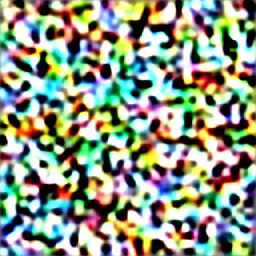

In [65]:
images[0]


In [66]:
images[0].size


(256, 256)

In [67]:
unet.save_pretrained('/home/ayushman/code/custom/train_mini_sd_poc/configs')
